In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=500, precision=1, suppress=True, floatmode='fixed')

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display dataset info
print("Shape of x_train =", x_train.shape)
print("Shape of y_train =", y_train.shape)
print("Shape of x_test  =", x_test.shape)
print("Shape of y_test  =", y_test.shape)

Shape of x_train = (60000, 28, 28)
Shape of y_train = (60000,)
Shape of x_test  = (10000, 28, 28)
Shape of y_test  = (10000,)


In [3]:
# Display an example
print("Input:")
print(x_train[0, :, :])
print("Output")
print(y_train[0])

Input:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253

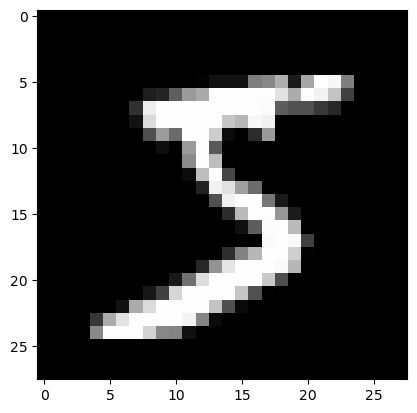

In [4]:
# Plot an example
plt.imshow(x_train[0, :, :], cmap='gray')

In [5]:
# Preprocess

# Normalize input vectors
# [0, 255] --> [0.0, 1.0]
X_train = x_train / 255
X_test = x_test / 255

# Encode target outputs using one-hot encoding
Y_train = tf.one_hot(y_train, 10)
Y_test = tf.one_hot(y_test, 10)

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-10-15 14:47:47.109523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-15 14:47:47.109666: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Display the preprocessed input
print(X_train[0, :, :])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
# Display the output in the one-host encoding
print("Output           =", y_train[0])
print("Output (one-hot) =", Y_train[0, :])

Output           = 5
Output (one-hot) = tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [8]:
# Define a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model
batch_size = 256
model.fit(X_train, Y_train, epochs=10, batch_size=batch_size, shuffle=True)

Epoch 1/10
30/30 [==============================] - 1s 9ms/step - loss: 0.2513 - accuracy: 0.9280
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2506 - accuracy: 0.9279
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2500 - accuracy: 0.9282
Epoch 4/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2493 - accuracy: 0.9284
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2486 - accuracy: 0.9284
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2480 - accuracy: 0.9289
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2473 - accuracy: 0.9288
Epoch 8/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2467 - accuracy: 0.9294
Epoch 9/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2460 - accuracy: 0.9292
Epoch 10/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2454 - accuracy: 0.9295


In [15]:
train_loss, train_acc = model.evaluate(X_train, Y_train, batch_size=batch_size)
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=batch_size)

10/10 [==============================] - 0s 8ms/step - loss: 0.2476 - accuracy: 0.9295


In [16]:
print(f"Training accuracy = {train_acc:.4f}")
print(f"Test accuracy     = {test_acc:.4f}")

Training accuracy = 0.9279
Test accuracy     = 0.9295
